In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd

df = pd.read_csv('SA_Aqar.csv')
df.head(2)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...


In [3]:
df.shape

(3718, 24)

In [4]:
print(df.isnull().sum())
df.drop('details',axis=1,inplace=True)

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64


In [5]:
df.duplicated().sum()

2207

In [6]:
df.drop_duplicates(inplace=True)

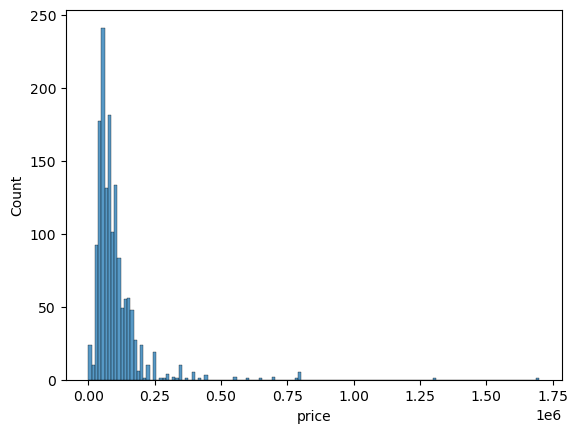

In [7]:
import  matplotlib.pyplot  as plt
import seaborn as sns

sns.histplot(df.price)
plt.show()

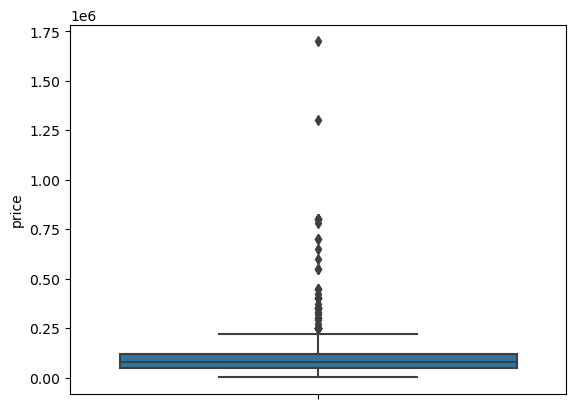

In [8]:
sns.boxplot(data=df,y=df.price)
plt.show()

In [9]:
target= df.price.values

In [10]:
import  numpy  as  np
logged_target=np.log(target)

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


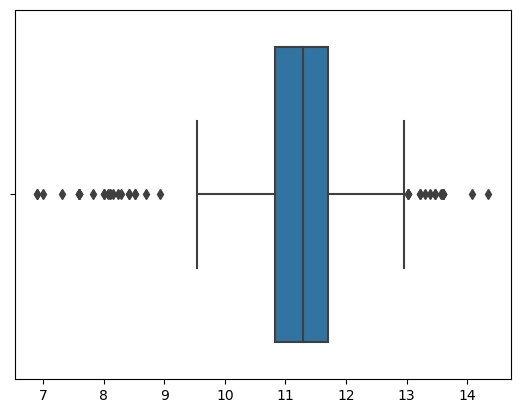

In [11]:
sns.boxplot(logged_target)
plt.show()

In [12]:
#df[['city']].apply(lambda x: x.astype('category'))

In [13]:
#df=df.drop(["city", "district", "front","front"],axis=1)

In [14]:
df.dtypes

city            object
district        object
front           object
size             int64
property_age     int64
bedrooms         int64
bathrooms        int64
livingrooms      int64
kitchen          int64
garage           int64
driver_room      int64
maid_room        int64
furnished        int64
ac               int64
roof             int64
pool             int64
frontyard        int64
basement         int64
duplex           int64
stairs           int64
elevator         int64
fireplace        int64
price            int64
dtype: object

In [15]:
#sns.pairplot(data=df)
#plt.show()

In [16]:
num_features=df.select_dtypes( "number").reset_index(drop=True)
text_features=df.select_dtypes( "object").reset_index(drop=True)

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
ohe.fit(text_features)
ohe_data=ohe.transform(text_features)
ohe_data=pd.DataFrame(ohe_data,columns=ohe.get_feature_names_out())

In [18]:
ohe_data.head()

,city_ الخبر,city_ الدمام,city_ الرياض,city_ جدة,district_ حي أحد,district_ حي ابحر الجنوبية,district_ حي ابحر الشمالية,district_ حي اشبيلية,district_ حي الأمل,district_ حي الاثير,...,front_3 شوارع,front_4 شوارع,front_جنوب,front_جنوب شرقي,front_جنوب غربي,front_شرق,front_شمال,front_شمال شرقي,front_شمال غربي,front_غرب
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
full_data=pd.concat([ohe_data,num_features],axis=1)
full_data.head()

,city_ الخبر,city_ الدمام,city_ الرياض,city_ جدة,district_ حي أحد,district_ حي ابحر الجنوبية,district_ حي ابحر الشمالية,district_ حي اشبيلية,district_ حي الأمل,district_ حي الاثير,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,1,0,0,80000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,60000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,1,0,0,60000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,55000
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,1,1,0,0,70000


In [20]:
features=full_data.drop('price',axis=1)
target=full_data.price

logged_taget = np.log(target)

In [21]:
from  sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,logged_taget,test_size=0.2,random_state=42)

In [22]:
from   sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
mae = mean_absolute_error(y_test, model.predict(X_test))
print('mae= '+ str(mae) )
msr= mean_squared_error(y_test, model.predict(X_test))
print('msr=  '+ str(msr) )
r2_score(y_test, model.predict(X_test))
r2score= r2_score(y_test, model.predict(X_test))
print('r2score=  '+ str(r2score) )

mae= 0.36424748657700295
msr=  0.35626768715291934
r2score=  0.32722351817806195


In [24]:
comp = np.column_stack((y_test, model.predict(X_test)))
comp[:4, :]

array([[12.4292162 , 11.45683956],
       [10.55581274, 10.41001391],
       [11.65268741, 11.43806291],
       [12.07254125, 12.18497074]])

<Axes: >

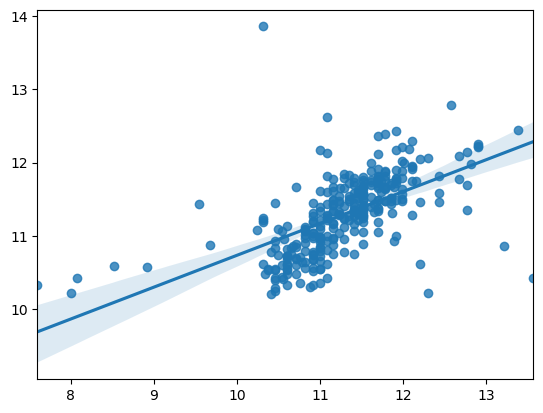

In [25]:
import seaborn as sns
sns.regplot(x=comp[:,0],y=comp[:,1])

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
pre= dt.predict(X_test)
mae = mean_absolute_error(y_test, pre)
mse = mean_squared_error(y_test, pre)
r2s = r2_score(y_test, pre)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.4790726597647944
mse=  0.701971885761572
r2s=  -0.3256048546380552


In [27]:
comp = np.column_stack((y_test, model.predict(X_test)))
comp[:3, :]

array([[12.4292162 , 11.45683956],
       [10.55581274, 10.41001391],
       [11.65268741, 11.43806291]])

<Axes: >

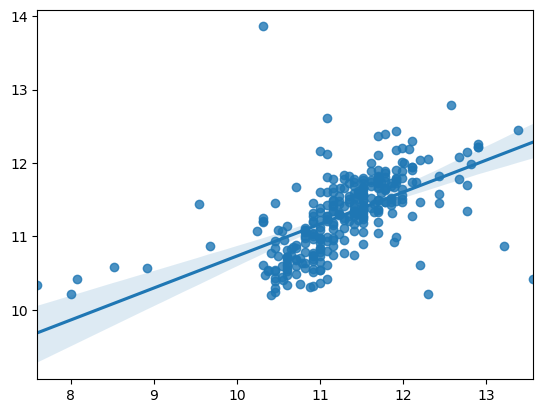

In [28]:
import seaborn as sns
sns.regplot(x=comp[:,0],y=comp[:,1])

In [29]:
#1-Scaling
#2-svd
#model

## Pipeline

In [30]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV


reg = make_pipeline(RobustScaler(),
                   TruncatedSVD(n_components=2),
                   DecisionTreeRegressor(max_depth=5, random_state=42))

In [31]:
reg.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('truncatedsvd', TruncatedSVD()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [32]:
predictions = reg.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.4909765299991152
mse=  0.4831275890433125
r2s=  0.08766107242231991


## Decision Tree Tuning
#### 1- max depth
#### 2- min_samples_leaf
#### 3- min_samples_split

In [33]:
reg = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('tsvd', TruncatedSVD()),
    ('model', DecisionTreeRegressor(random_state=42))
    
])

reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('tsvd', TruncatedSVD()),
                ('model', DecisionTreeRegressor(random_state=42))])

In [34]:
predictions = reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.5815635585781478
mse=  0.6898246232634454
r2s=  -0.3026659443131643


In [35]:
params = {'model__max_depth': [2, 3, 4, 5, 8, 10, 15, 20],
          'model__min_samples_split': [5, 10, 15, 20],
          'model__min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

dt_grid_model = GridSearchCV(estimator=reg, param_grid=params, n_jobs=-1)
dt_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('tsvd', TruncatedSVD()),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [2, 3, 4, 5, 8, 10, 15, 20],
                         'model__min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9,
                                                     10],
                         'model__min_samples_split': [5, 10, 15, 20]})

In [36]:
dt_grid_model.best_params_

{'model__max_depth': 3,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 10}

In [37]:
predictions = dt_grid_model.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.4919969852767962
mse=  0.49170894054393727
r2s=  0.07145603424441271


## Save Model

In [38]:
import pickle

with open("pipe_dt_model.pkl", "wb") as file:
    f = pickle.dump(dt_grid_model.best_estimator_, file)

In [40]:
model = pickle.load(open("pipe_dt_model.pkl", 'rb'))

In [41]:
model.predict(X_test)

array([11.12504913, 11.12504913, 11.35816041, 11.35816041, 11.35816041,
        9.96916028, 11.12504913, 11.35816041, 11.12504913, 11.35816041,
       11.12504913, 11.12504913, 11.12504913, 11.35816041, 11.35816041,
       11.12504913, 11.12504913, 11.12504913, 11.35816041, 11.12504913,
       11.12504913, 11.12504913, 11.12504913, 11.12504913, 11.12504913,
       11.12504913, 11.35816041, 11.35816041, 11.12504913, 11.12504913,
       11.12504913, 11.12504913, 11.12504913, 11.12504913, 11.12504913,
       11.12504913, 11.35816041, 11.12504913, 11.35816041, 11.82794447,
        9.96916028, 11.12504913, 11.82794447, 11.35816041, 11.35816041,
       11.12504913, 11.35816041, 11.12504913, 12.8984177 , 11.12504913,
       11.12504913, 11.35816041, 11.12504913, 11.35816041, 11.35816041,
       11.35816041, 11.12504913, 11.12504913, 11.12504913, 11.12504913,
       11.12504913, 11.12504913, 11.12504913, 11.12504913, 11.12504913,
       11.12504913, 11.82794447, 11.35816041, 11.12504913, 11.12

## Random Forest regression

#### Vanilla Model


In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                           random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
X_train.shape

(1208, 207)

In [44]:
predictions = rf.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.34196699248984885
mse=  0.32899870909024553
r2s=  0.378718300852559


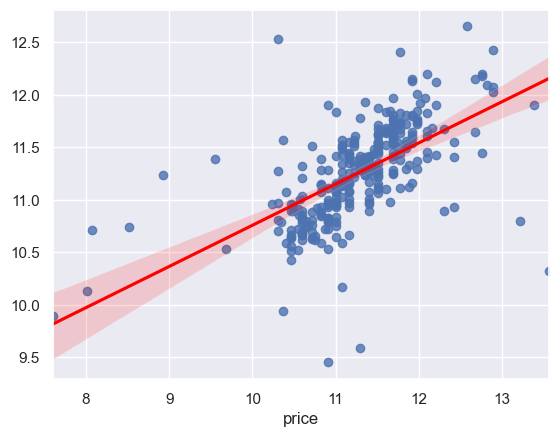

In [45]:
sns.set()

sns.regplot(x=y_test, y=predictions, line_kws={'color':'red'})
plt.show()

## Random Forest with pipeline

In [46]:
from sklearn.preprocessing import StandardScaler

rf_reg = Pipeline(steps=[
    
    ('scaler', StandardScaler()),
    ('tsvd', TruncatedSVD()),
    ('model', RandomForestRegressor(n_estimators=100,
                                    max_features=None,
                                    random_state=42))
    
])

rf_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('tsvd', TruncatedSVD()),
                ('model',
                 RandomForestRegressor(max_features=None, random_state=42))])

In [47]:
predictions = rf_reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.4393278900732263
mse=  0.4201438217867336
r2s=  0.2065997212944667


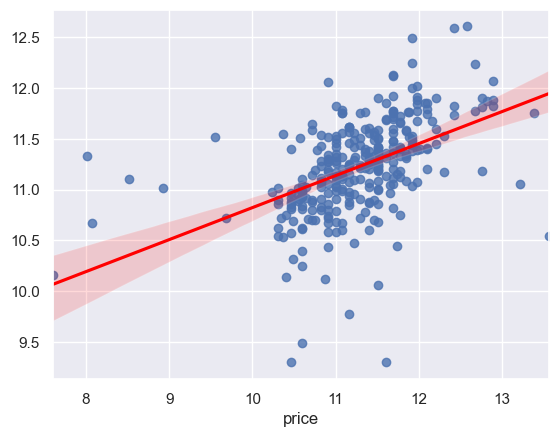

In [48]:
sns.regplot(x=y_test, y=predictions, line_kws={'color':'red'})
plt.show()

In [49]:
from sklearn.model_selection import RandomizedSearchCV

params = {'tsvd__n_components':[2,3,4,5,10],
          'model__n_estimators':[100,120, 150, 200],
          'model__max_depth': [2, 3, 4, 5, 8, 10, 15, 20],
          'model__min_samples_split': [5, 10, 15, 20],
          'model__min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

rf_grid_model = RandomizedSearchCV(rf_reg, params, n_iter=30, n_jobs=-1)
rf_grid_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('tsvd', TruncatedSVD()),
                                             ('model',
                                              RandomForestRegressor(max_features=None,
                                                                    random_state=42))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'model__max_depth': [2, 3, 4, 5, 8, 10,
                                                             15, 20],
                                        'model__min_samples_leaf': [2, 3, 4, 5,
                                                                    6, 7, 8, 9,
                                                                    10],
                                        'model__min_samples_split': [5, 10, 15,
                                                                     20],
                                        'model__n_estimators': [100, 120, 150,
                                                                200],
                                        'tsvd__n_components': [2, 3, 4, 5, 10]})

In [50]:
rf_grid_model.best_params_

{'tsvd__n_components': 10,
 'model__n_estimators': 120,
 'model__min_samples_split': 20,
 'model__min_samples_leaf': 8,
 'model__max_depth': 20}

In [51]:
predictions = rf_grid_model.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.3619251846331847
mse=  0.3437841145870861
r2s=  0.35079751698364336


In [52]:
from sklearn.ensemble import BaggingRegressor

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(),
                           n_estimators=200,
                           max_samples=.6,
                           max_features=.8,
                           bootstrap_features=False,
                           n_jobs=-1)

bag_reg.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), max_features=0.8,
                 max_samples=0.6, n_estimators=200, n_jobs=-1)

In [53]:
predictions = bag_reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.3339795925730329
mse=  0.3137807395962832
r2s=  0.4074559392795517


## Ada boost

In [54]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.01)
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01)

In [55]:
predictions = ada.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.4106897586581067
mse=  0.3947211021822393
r2s=  0.25460802648358105


In [56]:
ada.estimator_errors_.shape

(50,)

## Tuning Ada boost

In [57]:
params = {'learning_rate':np.linspace(0.001,1, 15),
         'n_estimators':[50, 100, 150, 200, 250]}

ada_grid_model = GridSearchCV(ada, param_grid=params, n_jobs=-1)
ada_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(learning_rate=0.01), n_jobs=-1,
             param_grid={'learning_rate': array([0.001     , 0.07235714, 0.14371429, 0.21507143, 0.28642857,
       0.35778571, 0.42914286, 0.5005    , 0.57185714, 0.64321429,
       0.71457143, 0.78592857, 0.85728571, 0.92864286, 1.        ]),
                         'n_estimators': [50, 100, 150, 200, 250]})

In [58]:
ada_grid_model.best_params_

{'learning_rate': 0.001, 'n_estimators': 150}

In [59]:
predictions = ada_grid_model.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.40253063977253567
mse=  0.3888332564619653
r2s=  0.2657266439502727


## Gradient Boosting Regression

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [61]:
predictions = gbr.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions)
print('mae= ', mae)
print('mse= ', mse)
print('r2s= ', r2s)

mae=  0.3496285513106304
mse=  0.33572372517784926
r2s=  0.36601876949800216


## Tune GBR

In [ ]:
params = dict(max_depth=[1,2,3,4],
             n_estimators=[100,200, 300],
             learning_rate=np.linspace(0.01,1, 15),
             min_samples_split=[5,7,10,15, 20, 25],
             subsample=[0.3,0.5, 0.7,1],
             min_samples_leaf=[2,3,4,7, 10, 15])
gbr_grid_model = GridSearchCV(gbr, param_grid=params, n_jobs=-1)
gbr_grid_model.fit(X_train, y_train)